In [1]:
import pandas as pd
import numpy as np

### Dataset is Telco Customer Churn
### Attributes are customerID,gender,senior citizen,partners,dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,
### OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,
### churn is the predictor variable (whether the customer churned out or not),"Predict behavior to retain customers"
## Drop customerID column which is not useful one.
### Done some basic EDA analysis using histogramsand boxplots.
### Used algorithms like Logistic Regression Model,XG Boost Model,Support Vector Machine Model
#### k-means and hierarchical clustering (unsupervised clustering methods)
### K-means clustering is a clustering algorithm that  partition n observations into k clusters.  K “means” (centroids) are generated at random.  K clusters are created and  assigned to each observation with the nearest centroid
### A type of unsupervised machine learning algorithm used to cluster unlabeled data points ,hierarchical clustering also groups together the data points with similar characteristics.
### The elbow method runs k-means clustering on the dataset for a range (1-10) and then for each value of k computes an average score for all clusters. 

In [12]:
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [2]:
%cd C:\\Users\DELL\Desktop\pyrhon in buss analytics

C:\Users\DELL\Desktop\pyrhon in buss analytics


In [3]:
tel=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',sep=",")

In [4]:
from xgboost import XGBClassifier

In [8]:
tel.TotalCharges = pd.to_numeric(tel.TotalCharges, errors='coerce')
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Removing missing values 
tel.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = tel.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Text(0.5, 1.0, '# of Customers by Contract Type')

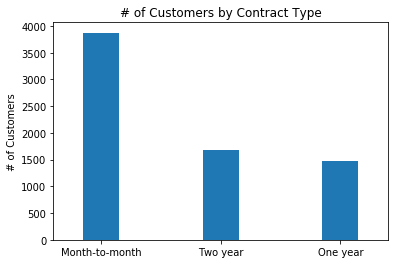

In [14]:
ax = tel['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')  ###  customers are in the month to month contract  are high,equal number of customers in the 1 year and 2 year contracts.

Text(0.5, 1.0, '# of Customers by their tenure')

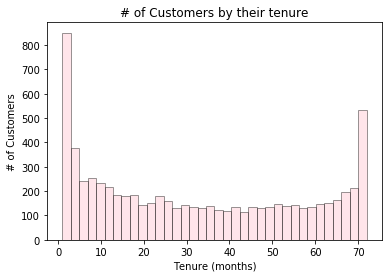

In [26]:
ax = sns.distplot(tel['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})    ### customers based on their tenures
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

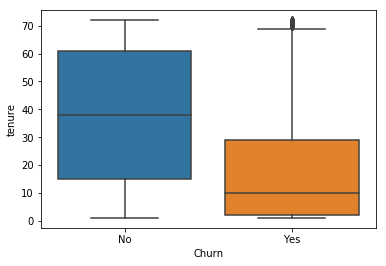

In [16]:
sns.boxplot(x = tel.Churn, y = tel.tenure)   ### customers who have a month to month contract have a very high churn rate.

### minmax Scalar - Normalization

In [17]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


###### Logistic Regression Model

In [18]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression      ### total charges and tenure are important features
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the  accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


#### XGBoost Model

In [21]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)           ### Accuracy is to asses the performance of the model 
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8132701421800947

## Support Vector Machine Model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [23]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')   #### gender plays a major role in predicting the churn
model.svm.fit(X_train,y_train)      ### accuracy is 82%
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [24]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

[[953  89]
 [164 201]]


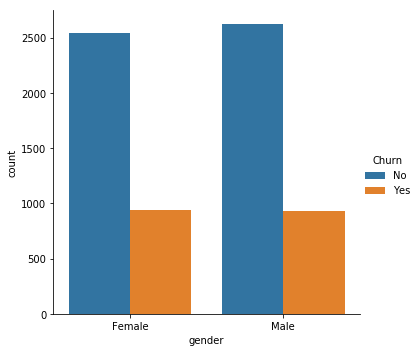

In [31]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=tel)
                  

### Unsupervised Learning With Python — K- Means and Hierarchical Clustering

In [32]:
# import KMeans
from sklearn.cluster import KMeans

In [35]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(df_dummies)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(df_dummies)

[[ 2.16855087e-01  6.62857143e+01  1.00409918e+02  6.65474342e+03
   1.32579651e-01  5.05652621e-01  4.94347379e-01  2.38437821e-01
   7.61562179e-01  6.60842754e-01  3.39157246e-01 -1.38777878e-17
   1.00000000e+00  1.45940391e-01 -1.38777878e-17  8.54059609e-01
   1.87050360e-01  8.12949640e-01  2.94209102e-15  4.01849949e-01
   2.94209102e-15  5.98150051e-01  2.19938335e-01  2.94209102e-15
   7.80061665e-01  2.27132580e-01  2.94209102e-15  7.72867420e-01
   3.80267215e-01  2.94209102e-15  6.19732785e-01  1.57245632e-01
   2.94209102e-15  8.42754368e-01  1.44912641e-01  2.94209102e-15
   8.55087359e-01  1.51079137e-01  2.88797533e-01  5.60123330e-01
   2.83658787e-01  7.16341213e-01  3.38129496e-01  3.34018499e-01
   2.82631038e-01  4.52209661e-02]
 [ 1.77095632e-01  3.74368359e+01  6.28133117e+01  1.93716316e+03
   2.26682409e-01  4.74616293e-01  5.25383707e-01  4.70484061e-01
   5.29515939e-01  6.94214876e-01  3.05785124e-01  1.34592680e-01
   8.65407320e-01  4.16174734e-01  1.3459

In [40]:
#standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(df_dummies)
dataset1_standardized = pd.DataFrame(dataset1_standardized)


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


### elbow method

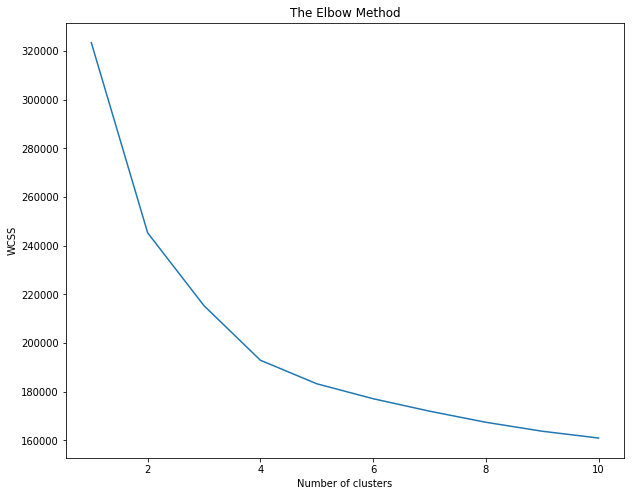

In [41]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### k-means clustering

In [45]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to dataframe 
df_dummies['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df_dummies.groupby('cluster').mean(),1))
kmeans_mean_cluster

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,0.2,34.4,68.0,2553.6,0.3,0.5,0.5,0.5,0.5,0.7,...,0.4,0.5,0.2,0.3,0.4,0.6,0.2,0.2,0.3,0.2
2.0,0.2,33.0,63.2,2244.7,0.3,0.5,0.5,0.5,0.5,0.7,...,0.4,0.5,0.2,0.2,0.4,0.6,0.2,0.2,0.3,0.2
3.0,0.2,30.4,65.0,2128.1,0.3,0.5,0.5,0.6,0.4,0.7,...,0.4,0.6,0.2,0.2,0.4,0.6,0.2,0.2,0.4,0.2
4.0,0.1,32.6,61.3,2205.9,0.3,0.5,0.5,0.5,0.5,0.7,...,0.4,0.5,0.2,0.3,0.4,0.6,0.2,0.2,0.3,0.3
5.0,0.2,31.9,64.0,2228.5,0.3,0.5,0.5,0.5,0.5,0.7,...,0.4,0.6,0.2,0.2,0.4,0.6,0.2,0.2,0.3,0.2


#### Hierarchical Clustering 

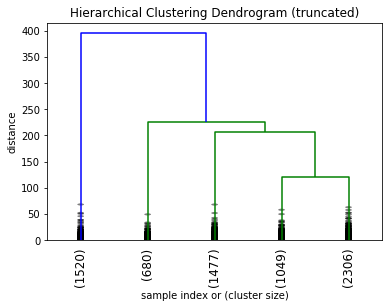

In [47]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2_standardized = dataset1_standardized
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # 
#creating the linkage matrix
H_cluster = linkage(dataset2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()


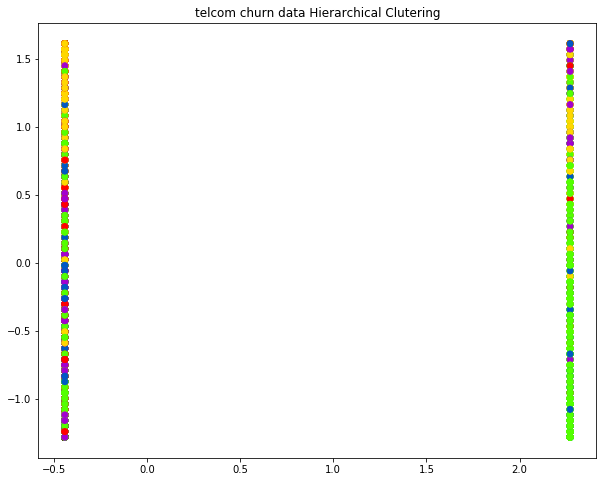

In [49]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(dataset2_standardized.iloc[:,0], dataset2_standardized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('telcom churn data Hierarchical Clutering')
plt.show()

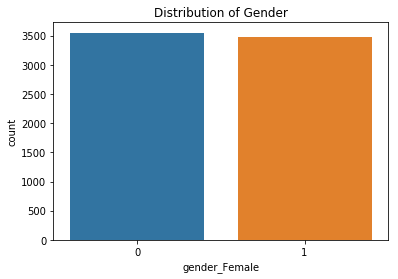

In [55]:
sns.countplot(x='gender_Female',data=df_dummies);
plt.title('Distribution of Gender');

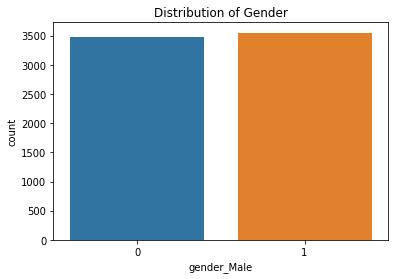

In [57]:
sns.countplot(x='gender_Male',data=df_dummies);
plt.title('Distribution of Gender');

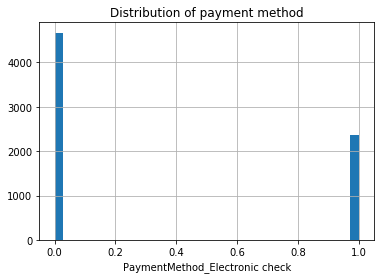

In [59]:
df_dummies.hist('PaymentMethod_Electronic check', bins=35);
plt.title('Distribution of payment method');
plt.xlabel('PaymentMethod_Electronic check');